# Einführung in die deskriptive Statistik mit R
Prof. Dr. Jan Kirenz, Hochschule der Medien

<h1>Inhaltsübersicht<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Datenimport-und-Datenprüfung" data-toc-modified-id="Datenimport-und-Datenprüfung-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Datenimport und Datenprüfung</a></span></li><li><span><a href="#Arithmetischer-Mittelwert" data-toc-modified-id="Arithmetischer-Mittelwert-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Arithmetischer Mittelwert</a></span></li><li><span><a href="#Getrimmter-arithmetischer-Mittelwert" data-toc-modified-id="Getrimmter-arithmetischer-Mittelwert-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Getrimmter arithmetischer Mittelwert</a></span></li><li><span><a href="#Median" data-toc-modified-id="Median-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Median</a></span></li><li><span><a href="#Varianz" data-toc-modified-id="Varianz-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Varianz</a></span></li><li><span><a href="#Standardabweichung" data-toc-modified-id="Standardabweichung-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Standardabweichung</a></span></li><li><span><a href="#Schiefe-und-Kurtosis" data-toc-modified-id="Schiefe-und-Kurtosis-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Schiefe und Kurtosis</a></span></li><li><span><a href="#Histogramm" data-toc-modified-id="Histogramm-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Histogramm</a></span></li><li><span><a href="#Wahrscheinlichkeitsdichtefunktion" data-toc-modified-id="Wahrscheinlichkeitsdichtefunktion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Wahrscheinlichkeitsdichtefunktion</a></span></li></ul></div>

### Datenimport und Datenprüfung

Import der Daten von GitHub: 

In [2]:
# install.packages('tidyverse')
library(tidyverse)
Advertising <- read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/advertising.csv")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.3.0
✔ tibble  1.4.2     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  TV = col_double(),
  radio = col_double(),
  newspaper = col_double(),
  sales = col_double()
)


Überblick über die Daten verschaffen (Skalenniveaus prüfen):

In [4]:
library(tidyverse)
glimpse(Advertising)

Observations: 200
Variables: 5
$ X1        <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17...
$ TV        <dbl> 230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 1...
$ radio     <dbl> 37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6,...
$ newspaper <dbl> 69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2...
$ sales     <dbl> 22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6, ...


- Beschreibung der relevanten Daten:
    + Variablen: *TV*, *radio*, *newspaper* enthalten jeweils Werbeausgaben in Tausend Dollar; *sales* = Produkte in Tausend Einheiten
    + Skalenniveaus: alle Variablen sind metrisch skaliert
    + Abhängige Variable (dependent variable, response): *sales*
    + Unabhängige Variablen (independent variables, predictors): *TV*, *radio*, *newspaper*

Für die weiteren Berechnungen wird die Variable X1 nicht benötigt, weshalb wir diese löschen: 

In [5]:
Advertising$X1 <- NULL

### Arithmetischer Mittelwert

Bei der Berechnung des *arithmetischen Mittelwerts* in R sollte immer die Anweisung gegeben werden, fehlende Werte auszuschließen ("remove values which are not available"). Ansonsten stoppt R bei fehlenden Werten die Berechnung und gibt eine Fehlermeldung aus.  

In [6]:
mean_sales <- mean(Advertising$sales, na.rm = TRUE)
print(paste0("Mittelwert der Variable Sales: ", mean_sales))

[1] "Mittelwert der Variable Sales: 14.0225"


### Getrimmter arithmetischer Mittelwert

Bei dem *getrimmten Mittelwert* wird ein bestimmer Anteil der größten und kleinsten Beobachtungen - hier oberhalb des 90% Quantils und unterhalb des 10 % Quantils - ignoriert. Damit sollen Ausreißer aus der Berechnung des Mittelwerts ausgeschlossen werden. Der getrimmte Mittelwert kann wie folgt in R berechnet werden: 

In [7]:
mean_trim_sales <- mean(Advertising$sales, trim = 0.1, na.rm = TRUE)
print(paste0("Getrimmter Mittelwert der Variable Sales: ", round(mean_trim_sales, 2)))

[1] "Getrimmter Mittelwert der Variable Sales: 13.78"


### Median

In [8]:
median_sales <- median(Advertising$sales, na.rm = TRUE)
print(paste0("Median der Variable Sales: ", median_sales))

[1] "Median der Variable Sales: 12.9"


### Varianz

Die Varianz einer Stichprobe wird wie folgt berechnet:

$$s^{2} = \frac{\sum_{i=1}^{n} \left(x_{i} - \bar{x}\right)^{2}} {n-1}$$

In [9]:
var_sales <- var(Advertising$sales, na.rm = TRUE)
print(paste0("Varianz der Variable Sales: ", round(var_sales, 2)))

[1] "Varianz der Variable Sales: 27.22"


### Standardabweichung

Die Standardabweichung ist ein häufig verwendetes Streuungsmaß und beschreibt die mittlere Abweichung der einzelnen Messwerte von dem arithmetischen Mittelwert. Die Standardabweichung ist die positive Wurzel der Varianz. 

Berechnung der Standardabweichung einer Stichprobe: $$s = \sqrt{\frac{\sum\limits_{i=1}^{n} \left(x_{i} - \bar{x}\right)^{2}} {n-1}}$$

In [10]:
sd_sales <-  sd(Advertising$sales, na.rm = TRUE)
print(paste0("Standardabweichung der Variable Sales: ", round(sd_sales,2)))

[1] "Standardabweichung der Variable Sales: 5.22"


### Schiefe und Kurtosis

Für die Ausgabe einer Übersicht mehrerer deskriptiver Statistiken (u.a. Schiefe und Kurtosis) kann das Paket `psych` genutzt werden:

In [11]:
# install.packages('psych')
library(psych)
psych::describe(Advertising)


Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



vars n   mean     sd        median trimmed   mad       min max  
TV        1    200 147.0425 85.854236 149.75 147.20188 108.82284 0.7 296.4
radio     2    200  23.2640 14.846809  22.90  22.99813  19.79271 0.0  49.6
newspaper 3    200  30.5540 21.778621  25.75  28.41437  23.12856 0.3 114.0
sales     4    200  14.0225  5.217457  12.90  13.78063   4.81845 1.6  27.0
          range skew        kurtosis   se       
TV        295.7 -0.06880905 -1.2435938 6.0708113
radio      49.6  0.09276672 -1.2763288 1.0498279
newspaper 113.7  0.88134434  0.5675817 1.5399810
sales      25.4  0.40147823 -0.4542196 0.3689299

* Hinweise zu den Kennzahlen:
    + vars: Nummer der Variable 
    + n: Anzahl der Beobachtungen 
    + mean: arithmetischer Mittelwert
    + sd: empirische Standardabweichung
    + median: Median
    + trimmed: getrimmter Mittelwert 
    + mad: Mittlere absolute Abweichung vom Median
    + min: kleinster Beobachtungswert
    + max: größter Beobachtungswert
    + range: Spannweite 
    + skew: Schiefe 
    + kurtosis: Wölbung
    + se = Standardfehler


Die *Schiefe* ist eine statistische Kennzahl, die die Art und Stärke der Asymmetrie einer Wahrscheinlichkeitsverteilung beschreibt. Sie zeigt an, ob und wie stark die Verteilung nach rechts (positive Schiefe, linkssteil, rechtsschief) oder nach links (negative Schiefe, rechtssteil, linksschief) geneigt ist. Jede nicht symmetrische Verteilung heißt schief.

Die Abweichung des Verlaufs einer Verteilung vom Verlauf einer Normalverteilung wird *Kurtosis* (Wölbung) genannt. Sie gibt an, wie spitz die Kurve verläuft. Unterschieden wird zwischen positiver, spitz zulaufender (leptokurtische Verteilung) und negativer, flacher (platykurtische Verteilung) Kurtosis. Die Kurtosis zählt zu den zentralen Momenten einer Verteilung, mittels derer der Kurvenverlauf definiert wird. Eine Kurtosis mit Wert 0 ist normalgipflig (mesokurtisch), ein Wert größer 0 ist steilgipflig und ein Wert unter 0 ist flachgipflig. 

### Histogramm

Erstellung eines Histogramms für die Variable *sales*. 

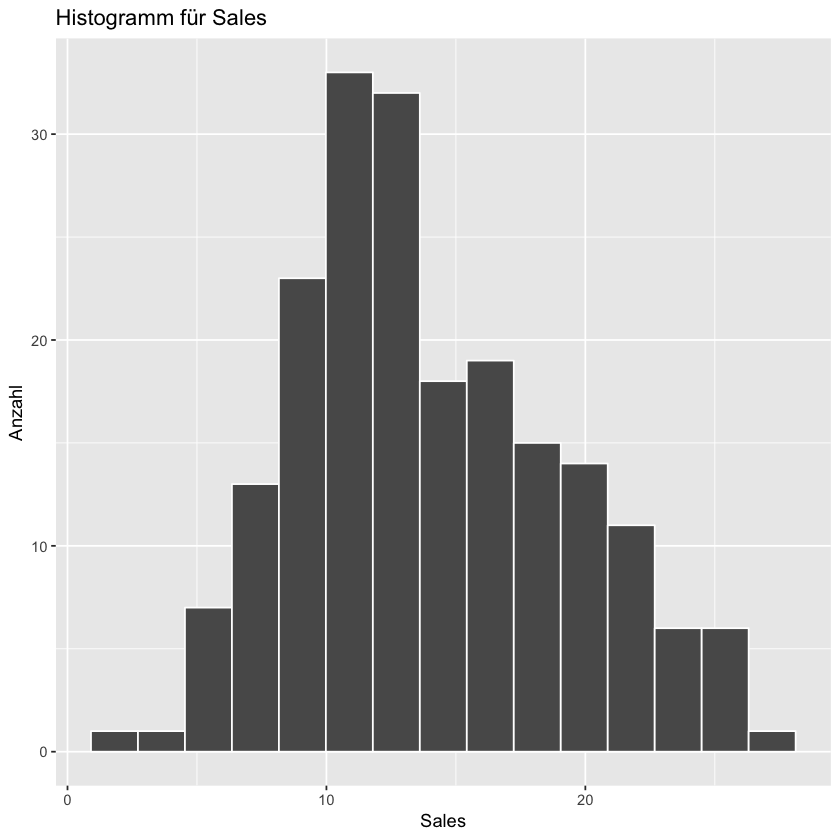

In [12]:
library(ggplot2)
ggplot(Advertising, aes(sales)) +
  geom_histogram(bins=15, color="white")  +
  labs(title="Histogramm für Sales", x="Sales", y="Anzahl")

### Wahrscheinlichkeitsdichtefunktion

Erstellung einer Wahrscheinlichkeitsdichtefunktion (mit Darstellung verschiedener Kennzahlen) für die Variable *sales*. 

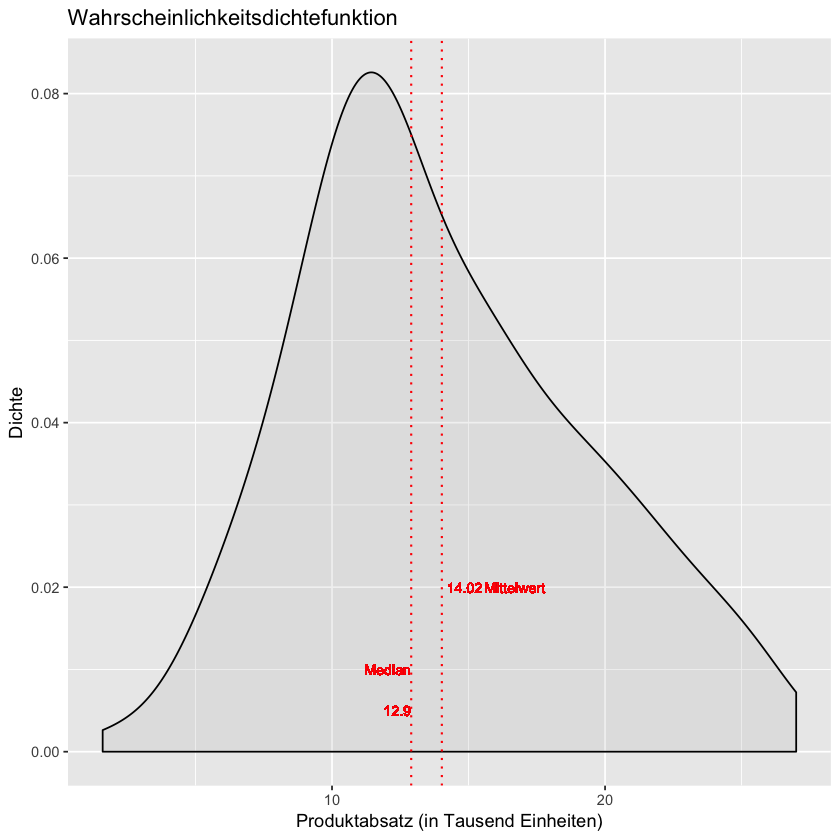

In [14]:
library(ggplot2)
ggplot(Advertising, aes(sales)) +
  geom_density(fill="grey",alpha=.2 ) +
  geom_vline(aes(xintercept=mean(sales, na.rm=TRUE)), color="red", linetype="dotted", size=0.6) +
  geom_vline(aes(xintercept=median(sales, na.rm=TRUE)), color="red", linetype="dotted", size=0.6) +
  geom_text(aes(x=median(sales), y=0.02), colour = "red", size =3,  
             label=round(mean(Advertising$sales), digits=2), hjust=-1) +
  geom_text(aes(x=mean(sales), y=0.02), hjust=-0.7, colour = "red", size = 3, label="Mittelwert") +
  geom_text(aes(x=median(sales), y=0.005), colour = "red", size =3, 
             label=round(median(Advertising$sales), digits=2), hjust=1) +
  geom_text(aes(x=median(sales), y=0.01), colour = "red", size = 3, label="Median", hjust=1) +
  labs(x="Produktabsatz (in Tausend Einheiten)", y = "Dichte", title = "Wahrscheinlichkeitsdichtefunktion") 

In der Abbildung kann man erkennen, dass es sich um eine asymmetrische Verteilung handelt (d.h. es liegt eine Abweichung von der Normalverteilung vor). Konkret handelt es sich um eine rechtsschiefe Verteilung (Mittelwert > Median; Schiefe = + 0.40).